<a href="https://colab.research.google.com/github/hamsika04/6thSem-ML-Lab/blob/main/1BM22CS054_LabExamPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model Accuracy (without PCA):
Logistic Regression: 0.9722
Number of components selected by PCA (retaining 95% variance): 40

Model Accuracy (with PCA):
Logistic Regression: 0.9611


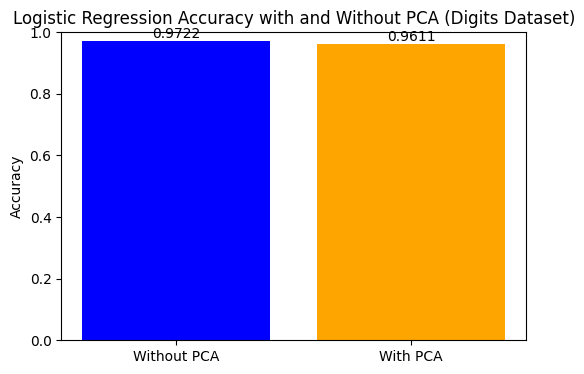

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_no_pca, X_test_no_pca, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_no_pca = LogisticRegression(max_iter=1000)
print("Model Accuracy (without PCA):")
model_no_pca.fit(X_train_no_pca, y_train)
preds_no_pca = model_no_pca.predict(X_test_no_pca)
accuracy_no_pca = accuracy_score(y_test, preds_no_pca)
print(f"Logistic Regression: {accuracy_no_pca:.4f}")


pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"Number of components selected by PCA (retaining 95% variance): {pca.n_components_}")

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

model_with_pca = LogisticRegression(max_iter=1000)
print("\nModel Accuracy (with PCA):")
model_with_pca.fit(X_train_pca, y_train_pca)
preds_with_pca = model_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test_pca, preds_with_pca)
print(f"Logistic Regression: {accuracy_with_pca:.4f}")

labels = ['Without PCA', 'With PCA']
accuracies = [accuracy_no_pca, accuracy_with_pca]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy with and Without PCA (Digits Dataset)')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.show()


Model Accuracy (without dimensionality reduction):
Logistic Regression: 0.9722

Original number of features: 64
Number of features after selection with Random Forest: 32

Model Accuracy (with Random Forest feature selection):
Logistic Regression: 0.9500

Number of components selected by PCA (retaining 95% variance): 40

Model Accuracy (with PCA):
Logistic Regression: 0.9611


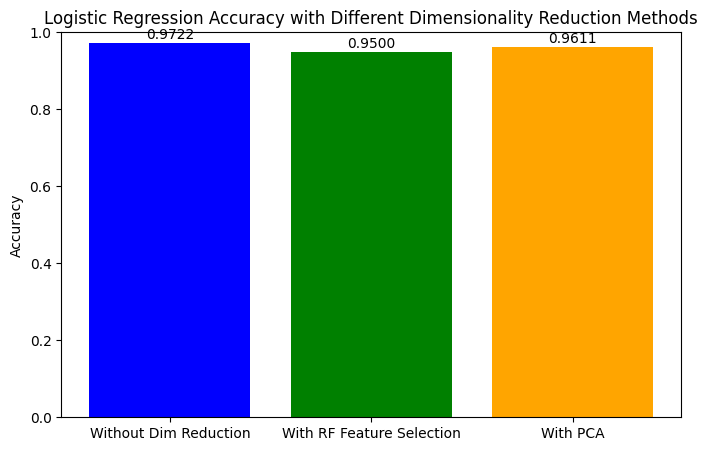

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

digits = load_digits()
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_no_pca, X_test_no_pca, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model_no_pca = LogisticRegression(max_iter=1000)
print("Model Accuracy (without dimensionality reduction):")
model_no_pca.fit(X_train_no_pca, y_train)
preds_no_pca = model_no_pca.predict(X_test_no_pca)
accuracy_no_pca = accuracy_score(y_test, preds_no_pca)
print(f"Logistic Regression: {accuracy_no_pca:.4f}")


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

model_selection = SelectFromModel(rf, prefit=True, threshold='median')
X_reduced_rf = model_selection.transform(X_scaled)

print(f"\nOriginal number of features: {X_scaled.shape[1]}")
print(f"Number of features after selection with Random Forest: {X_reduced_rf.shape[1]}")


X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_reduced_rf, y, test_size=0.2, random_state=42
)

model_with_rf_selection = LogisticRegression(max_iter=1000)
print("\nModel Accuracy (with Random Forest feature selection):")
model_with_rf_selection.fit(X_train_rf, y_train_rf)
preds_with_rf_selection = model_with_rf_selection.predict(X_test_rf)
accuracy_with_rf_selection = accuracy_score(y_test_rf, preds_with_rf_selection)
print(f"Logistic Regression: {accuracy_with_rf_selection:.4f}")


pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print(f"\nNumber of components selected by PCA (retaining 95% variance): {pca.n_components_}")

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

model_with_pca = LogisticRegression(max_iter=1000)
print("\nModel Accuracy (with PCA):")
model_with_pca.fit(X_train_pca, y_train_pca)
preds_with_pca = model_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test_pca, preds_with_pca)
print(f"Logistic Regression: {accuracy_with_pca:.4f}")

labels = ['Without Dim Reduction', 'With RF Feature Selection', 'With PCA']
accuracies = [accuracy_no_pca, accuracy_with_rf_selection, accuracy_with_pca]

plt.figure(figsize=(8, 5))
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Logistic Regression Accuracy with Different Dimensionality Reduction Methods')
plt.ylim(0, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.01, f'{acc:.4f}', ha='center')

plt.show()